<a href="https://colab.research.google.com/github/ndb796/AI-Theory-and-Practical-Project/blob/master/Linear%20Regression%20%EB%B0%94%EB%8B%A5%EB%B6%80%ED%84%B0%20%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression 구현

* Linear Regression을 Python만을 이용하여 구현합니다.

학습 목적의 데이터 준비

|하루 노동 시간| 하루 매출 |
|:--------|:--------:|
| 1 | 25,000 |
| 2 | 55,000 |
| 3 | 75,000 |
| 4 | 110,000 |
| 5 | 128,000 |
| 6 | 155,000 |
| 7 | 180,000 |

* 목표: 하루 노동 시간이 8시간일 때 하루 매출은 얼마가 될까?

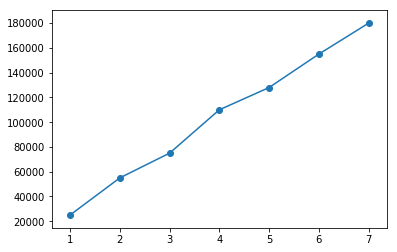

In [3]:
import matplotlib.pyplot as plt

X = [1, 2, 3, 4, 5, 6, 7]
Y = [25000, 55000, 75000, 110000, 128000, 155000, 180000]

plt.plot(X, Y)
plt.scatter(X, Y)

가설 클래스를 정의합니다.

* Forward: 모델에서 정방향으로(왼쪽에서 오른쪽으로) 입력을 받아 결과를 출력하는 과정

In [0]:
# 가설 (학습 시킬 대상)
class H():
    def __init__(self, w):
        self.w = w
    # 결과를 반환하는 함수
    def forward(self, x):
        return self.w * x
    # 가설의 비용을 구하는 함수 (낮추어야 할 대상)
    def get_cost(self, X, Y):
        cost = 0
        for i in range(len(X)):
            cost += (self.forward(X[i]) - Y[i]) ** 2
        cost = cost / len(X)
        return cost
    # 기울기를 계산하는 함수
    def get_gradient(self, X, Y):
        cost = self.get_cost(X, Y)
        dw = 0.001
        self.w = self.w + dw
        next_cost = self.get_cost(X, Y)
        self.w = self.w - dw
        dcost = next_cost - cost
        gradient = dcost / dw
        return gradient, next_cost
    # 미분으로 기울기를 계산하는 함수
    def get_gradient_using_derivative(self, X, Y):
        gradient= 0
        for i in range(len(X)):
            gradient += (h.forward(X[i]) - Y[i]) * X[i]
        gradient = gradient / len(X)
        cost = self.get_cost(X, Y)
        return gradient, cost
    # w 값을 변경하는 함수
    def set_w(self, w):
        self.w = w
    # w 값을 반환하는 함수
    def get_w(self):
        return self.w

W에 따른 비용 확인하기

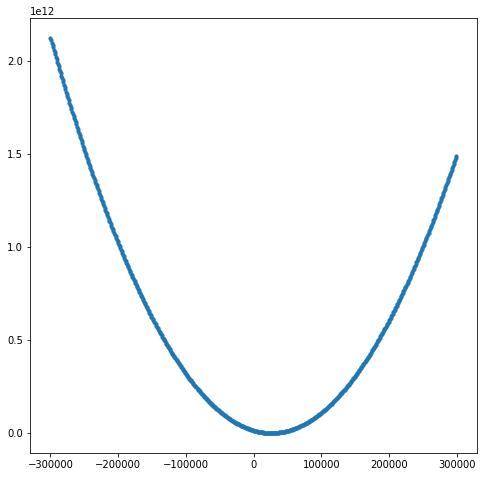

In [11]:
cost_list = []
w_list = []

# w를 -300,000부터 300,000까지 바꾸어 보며 비용 확인
for i in range(-300, 300):
    w = i * 1000
    h = H(w)
    cost = h.get_cost(X, Y)
    w_list.append(w)
    cost_list.append(cost)

# 결과적으로 약 25,000 정도일 때 최소 비용임을 확인
plt.figure(figsize=(8, 8))
plt.scatter(w_list, cost_list, s=10)

기본적인 기울기 함수를 이용하여 학습을 진행합니다.

In [20]:
w = 4
h = H(w)
learning_rate = 0.001
    
for i in range(1001):
    gradient, cost = h.get_gradient(X, Y)
    h.set_w(h.get_w() + learning_rate * -gradient)
    if i % 100 == 0:
        print(i, ':', h.get_w(), cost, gradient)
        
print(h.forward(8))

0 : 1040.982837677002 13450707854.445734 -1036982.837677002
100 : 25508.7093696855 12866409.329345493 -17494.231628254056
200 : 25921.487729942426 9041904.974602956 -295.13327591121197
300 : 25928.451432697475 9040816.633925963 -4.97899204492569
400 : 25928.56891258061 9040816.326581813 -0.08399970829486847
500 : 25928.570894498378 9040816.326534929 -0.0014174729585647583
600 : 25928.570927930996 9040816.326535601 -2.60770320892334e-05
700 : 25928.570928480476 9040816.326535614 0.0
800 : 25928.570928480476 9040816.326535614 0.0
900 : 25928.570928480476 9040816.326535614 0.0
1000 : 25928.570928480476 9040816.326535614 0.0
207428.5674278438


편미분을 활용한 기울기 함수를 이용하여 학습을 진행할 수도 있습니다.

In [19]:
w = 4
h = H(w)
learning_rate = 0.001
    
for i in range(1001):
    gradient, cost = h.get_gradient_using_derivative(X, Y)
    h.set_w(h.get_w() + learning_rate * -gradient)
    if i % 100 == 0:
        print(i, ':', h.get_w(), cost, gradient)
        
print(h.forward(8))

0 : 522.4914285714286 13450708891.428572 -518491.4285714286
100 : 22559.22838194486 245452156.7232572 -68762.10299237898
200 : 25481.730650070742 13198806.358415255 -9119.199561238527
300 : 25869.311602971 9113946.833198523 -1209.3841959271615
400 : 25920.7124168179 9042102.54197713 -160.3879949699684
500 : 25927.529169922913 9040838.948419202 -21.270584663615278
600 : 25928.43320469233 9040816.72440319 -2.820895491753098
700 : 25928.553097381973 9040816.333528368 -0.37410590728437193
800 : 25928.56899749722 9040816.326653682 -0.04961375936753549
900 : 25928.571106163447 9040816.32653277 -0.006579754737945872
1000 : 25928.571385813826 9040816.326530641 -0.0008726041799361285
207428.5710865106
